# Rainfall Prediction - Training a Binary Classifier
## Exploratory Data Analysis
### Missing Values and Outliers
As usual we need to load in the libraries, and data, we will be using. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rainfall = pd.read_csv("weatherAUS.csv")

The next step is to create two new dataframes to segregate the numerical and categorical data for further analysis.

In [2]:
categorical = rainfall.select_dtypes(include=['object'])
numerical = rainfall.select_dtypes(include=['int64','float64'])

We can also use the pandas function `isnull` to see how many missing values each variable has. 

In [3]:
rainfall.isnull().sum(axis = 0)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

And, for the categorical variables, we can use the pandas function `nunique` to see how many categories each variable has.

In [4]:
categorical.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

Now, we can use the pandas function `describe` to see what columns we might expect to contain outliers.

In [5]:
numerical.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


From the output  we can see that Rainfall and Evaporation have maxmimum values many times higher than their means, so we expect these to be the variables which might contain severe outliers. We can get a better idea of how anomalous these data points might be by visualising the variables as boxplots.

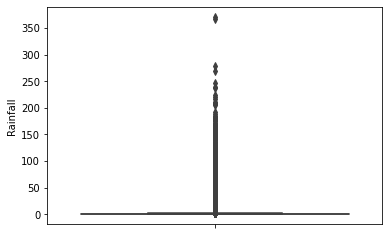

In [6]:
sns.boxplot(y=rainfall['Rainfall']);

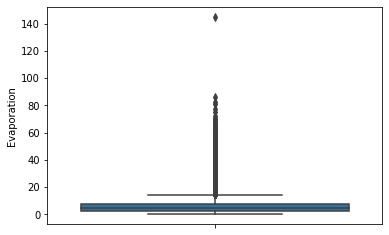

In [7]:
sns.boxplot(y=rainfall['Evaporation']);

As the plots above show, there are some clear outliers in the data. To confirm this numerically we can calculate the interquartile range of the variables as follows.

In [8]:
lb = rainfall['Rainfall'].quantile(0.25)
ub = rainfall['Rainfall'].quantile(0.75)
print("The lower bound for the interquartile range for rainfall is {}, "\
      "the upper bound is {}, "\
      "and the interquartile range is calculated to be {}".format(lb,ub, ub-lb))

The lower bound for the interquartile range for rainfall is 0.0, the upper bound is 0.8, and the interquartile range is calculated to be 0.8


In [9]:
lb = rainfall['Evaporation'].quantile(0.25)
ub = rainfall['Evaporation'].quantile(0.75)
print("The lower bound for the interquartile range for evaporation is {}, "\
      "the upper bound is {}, "\
      "and the interquartile range is calculated to be {}".format(lb,ub, ub-lb))

The lower bound for the interquartile range for evaporation is 2.6, the upper bound is 7.4, and the interquartile range is calculated to be 4.800000000000001
